In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import math
import pandas as pd

### Auxiliary Methods for EDA, and also preprocessing of the data

In [3]:
import re

def remove_emoji(text):
    emoji_pattern = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U0001F1F2"
                        u"\U0001F1F4"
                        u"\U0001F620"
                        u"\u200d"
                        u"\u2640-\u2642"
                        u"\u2600-\u2B55"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                        u"\U00002500-\U00002BEF"  # Chinese char
                        u"\U00010000-\U0010ffff"
                        "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

In [4]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [5]:
from unidecode import unidecode
import string

def preprocess_review(review):
    preproc_review = review.lower()

    SAD_FACE = [':(', ':c']
    HAPPY_FACE = [':)', ':D']

    for face in SAD_FACE:
        if face in preproc_review:
                preproc_review = preproc_review.replace(face, 'sad')

    for face in HAPPY_FACE:
        if face in review:
                preproc_review = preproc_review.replace(face, 'happy')

    preproc_review = preproc_review.translate(str.maketrans('', '', '0123456789'))
    preproc_review = remove_emoji(preproc_review)
    preproc_review = unidecode(preproc_review)
    preproc_review = decontracted(preproc_review)
    preproc_review = preproc_review.translate(str.maketrans('', '', string.punctuation))

    return preproc_review

In [6]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def stem_tokenizer(review):

    review_tokens = word_tokenize(review)

    ps = PorterStemmer()

    return [ps.stem(word) for word in review_tokens]

In [115]:
def plot_pie_chart(df, feature: str, name: str):
    counts = df[feature].value_counts(normalize=True) * 100
    print(f"{feature} Distribution (%):\n", counts)

    # fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    fig, ax = plt.subplots()

    ax.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightblue', 'orange']
    )
    ax.set_title('Proportion of Review Scores')

    plt.savefig(f"{name}.pdf", format='pdf')
    plt.show()

In [8]:
def top_feature(df, feature):
    top_apps = df['feature'].value_counts().head(10)
    top_apps.plot(kind='bar')
    plt.title(f'Top 10 {feature}')
    plt.savefig(f"top_{feature}.pdf", format='pdf')
    plt.show()

In [9]:
def count_unique(df, feature):
    unique_counts = df['feature'].nunique()
    print(f'Number of unique {feature}: {unique_counts}')

In [11]:
from wordcloud import WordCloud 

def WordCloud_generator(data, title=None):
    
    most_freq = Counter(data).most_common(1000) 
    text = ' '.join([x[0] for x in most_freq])
    
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 10,
                          collocations=False
                         ).generate(text)

    # plot the Word Cloud                      
    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=25)
    plt.show() 

In [12]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import nltk

def count_vectorizer():
        
    nltk.download('stopwords')
    nltk.download('punkt_tab')

    new_stopwords = stopwords.words('english')
    new_stopwords.remove('no')
    new_stopwords.remove('not')
    new_stopwords.append('becaus')

    custom_stopwords = []

    for w in new_stopwords:
        custom_stopwords.append(stem_tokenizer(preprocess_review(w))[0])

    custom_vect = CountVectorizer(preprocessor=preprocess_review,
                                tokenizer=stem_tokenizer,
                                stop_words=custom_stopwords,
                                max_features=5000)

    return custom_vect

custom_vect = count_vectorizer()
# data_vect = custom_vect.fit_transform(data)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bol8clj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/bol8clj/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Read into data frames all the files containing the splits of the training data

In [14]:
data_1 = pd.read_csv('train_without_null_1.csv')
data_2 = pd.read_csv('train_without_null_2.csv')
data_3 = pd.read_csv('train_without_null_3.csv')
data_4 = pd.read_csv('train_without_null_4.csv')
data_5 = pd.read_csv('train_without_null_5.csv')

test_data = pd.read_csv('test_without_null.csv')

In [18]:
data_1.head(10)

,app_id,app_name,review_text,review_score,review_votes
0,388880,Oxenfree,If you're after a deliciously surreal experien...,1,0
1,207210,Tony Hawk's Pro Skater HD,"This game isn't meant to be discovered now, th...",1,0
2,386260,Microcosmum: survival of cells,Had to get a refund. Boring Not Fun Rather ...,-1,0
3,48000,LIMBO,Limbo is a fantastic game to play with a gamep...,1,0
4,113400,APB Reloaded,Very Fun game with others. Would recommend to ...,1,0
5,242050,Assassin's Creed IV Black Flag,A fun game and good port!,1,0
6,227300,Euro Truck Simulator 2,Just recently picked this one up. I have no id...,1,0
7,208650,Batman™: Arkham Knight,I am not even able to start the game. When I p...,-1,0
8,310950,Street Fighter V,Seems to be working as it should now. Still li...,1,0
9,291480,Warface,"Tons of hackers, if u enjoy to get spawn ♥♥♥♥♥...",-1,0


In [19]:
test_data.head(10)

,app_id,app_name,review_text,review_score,review_votes
0,291550,Brawlhalla,Early Access Review,1,0
1,206440,To the Moon,i cried so hard when realize river made so muc...,1,0
2,65800,Dungeon Defenders,when i am done waching the vid in the begining...,-1,0
3,205100,Dishonored,Dishonored starts out pretty grim as you find ...,1,0
4,536630,Maze Sounds,I wish the ' Do you recommend this game? ' had...,-1,0
5,230410,Warframe,Its ok,1,0
6,410670,Suits: A Business RPG,Well done. I liked the story and the game play...,1,0
7,325610,Total War: ATTILA,Much better than Rome II. Having a lot of fun ...,1,0
8,212680,FTL: Faster Than Light,Great game intresting concept really makes you...,1,0
9,322500,SUPERHOT,Exactly how clever this John Woo style shooter...,1,0


In [114]:
reviews_text = data_1['review_text'].reset_index(name='text')

tc = reviews_text['text'].value_counts().reset_index(name='count')
tc.rename(columns={'index': 'text'}, inplace=True)
tc.head(10)

,text,count
0,Early Access Review,195472
1,Early Access Review,2053
2,10/10,1245
3,.,945
4,great game,764
5,Great game,736
6,Great game!,482
7,:),415
8,Nice game,356
9,♥♥♥♥,341


review_score Distribution (%):
 review_score
 1    82.328124
-1    17.671876
Name: proportion, dtype: float64


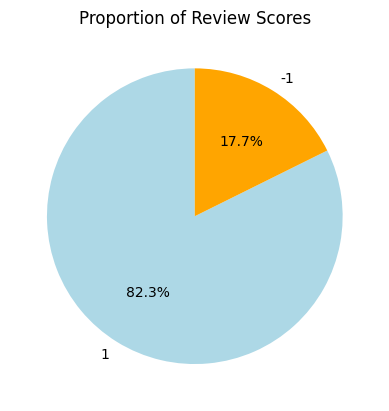

In [28]:
plot_pie_chart(data_1, 'review_score')

review_score Distribution (%):
 review_score
 1    82.347235
-1    17.652765
Name: proportion, dtype: float64


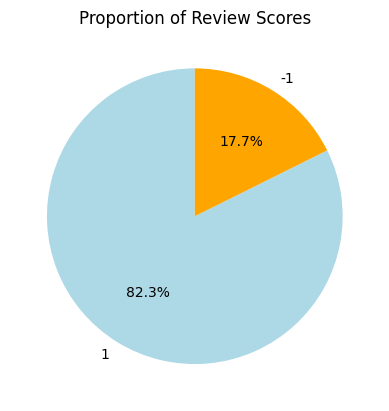

In [29]:
plot_pie_chart(data_2, 'review_score')

review_score Distribution (%):
 review_score
 1    82.338001
-1    17.661999
Name: proportion, dtype: float64


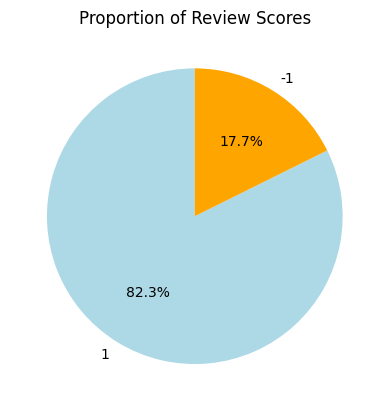

In [30]:
plot_pie_chart(data_3, 'review_score')

review_score Distribution (%):
 review_score
 1    82.249256
-1    17.750744
Name: proportion, dtype: float64


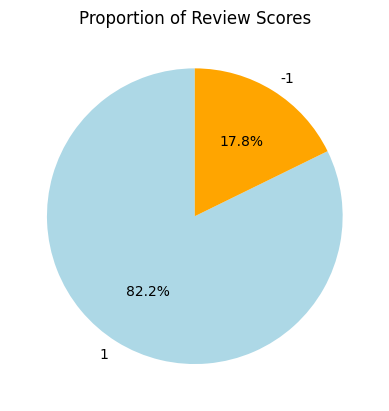

In [31]:
plot_pie_chart(data_4, 'review_score')

review_score Distribution (%):
 review_score
 1    82.360631
-1    17.639369
Name: proportion, dtype: float64


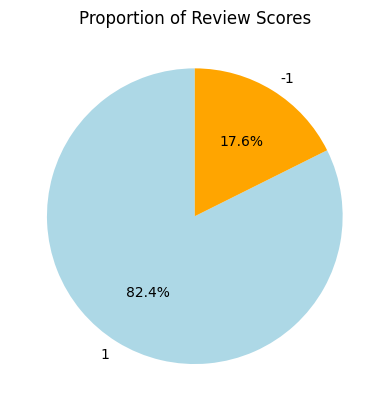

In [32]:
plot_pie_chart(data_5, 'review_score')

review_score Distribution (%):
 review_score
 1    82.294131
-1    17.705869
Name: proportion, dtype: float64


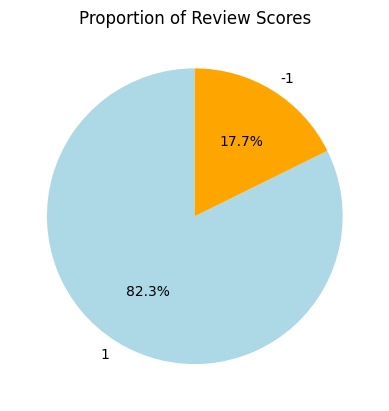

In [33]:
plot_pie_chart(test_data, 'review_score')

In [34]:
X_train_1 = data_1['review_text']
y_train_1 = data_1['review_score']

X_train_2 = data_2['review_text']
y_train_2 = data_2['review_score']

X_train_3 = data_3['review_text']
y_train_3 = data_3['review_score']

X_train_4 = data_4['review_text']
y_train_4 = data_4['review_score']

X_train_5 = data_5['review_text']
y_train_5 = data_5['review_score']

X_test = test_data['review_text']
y_test = test_data['review_score']

In [ ]:
all_classes = [1,-1]

In [ ]:
y_test.head(10)

In [ ]:
count_unique(y_train_1, 'review_score')

### Convert the collections of text documents (review texts) to a matrix of token counts. Save all the  matrices of token counts for future use.

In [36]:
X_vect_train_1 = custom_vect.fit_transform(X_train_1)
# No need to transform the test data because you already did in the Review_All.ipynb 

/mnt/c/Users/bol8clj/Documents/DistributedML_Test/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [37]:
import pickle

with open('trainVect_1.pkl', 'wb') as fout:
    pickle.dump(X_vect_train_1, fout)

In [38]:
X_vect_train_2 = custom_vect.fit_transform(X_train_2)

/mnt/c/Users/bol8clj/Documents/DistributedML_Test/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [39]:
import pickle

with open('trainVect_2.pkl', 'wb') as fout:
    pickle.dump(X_vect_train_2, fout)

In [40]:
X_vect_train_3 = custom_vect.fit_transform(X_train_3)

In [41]:
import pickle

with open('trainVect_3.pkl', 'wb') as fout:
    pickle.dump(X_vect_train_3, fout)

In [42]:
X_vect_train_4 = custom_vect.fit_transform(X_train_4)

In [43]:
import pickle

with open('trainVect_4.pkl', 'wb') as fout:
    pickle.dump(X_vect_train_4, fout)

In [44]:
X_vect_train_5 = custom_vect.fit_transform(X_train_5)

In [45]:
import pickle

with open('trainVect_5.pkl', 'wb') as fout:
    pickle.dump(X_vect_train_5, fout)

### WordCloud

In [64]:
negative_words = test_data[(test_data["review_score"] == -1)]
negative_words = negative_words["review_text"]

In [133]:
positive_words = test_data[(test_data["review_score"] == 1)]
positive_words = positive_words["review_text"]

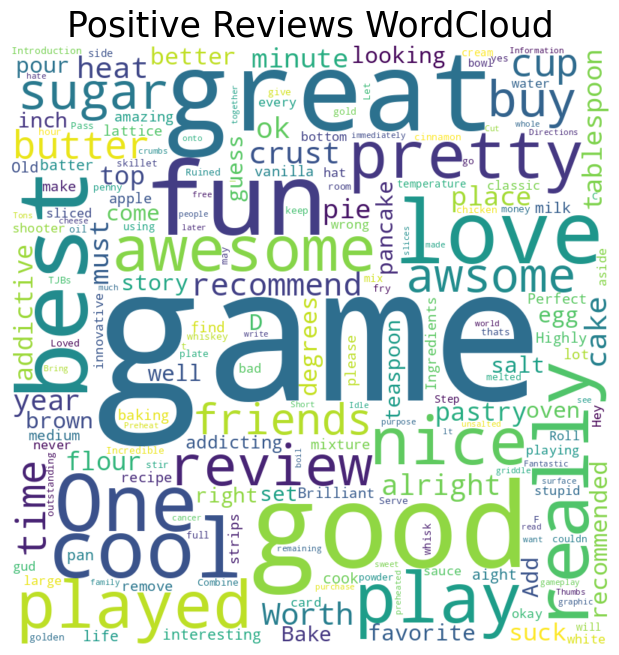

In [134]:
WordCloud_generator(positive_words, "Positive Reviews WordCloud")

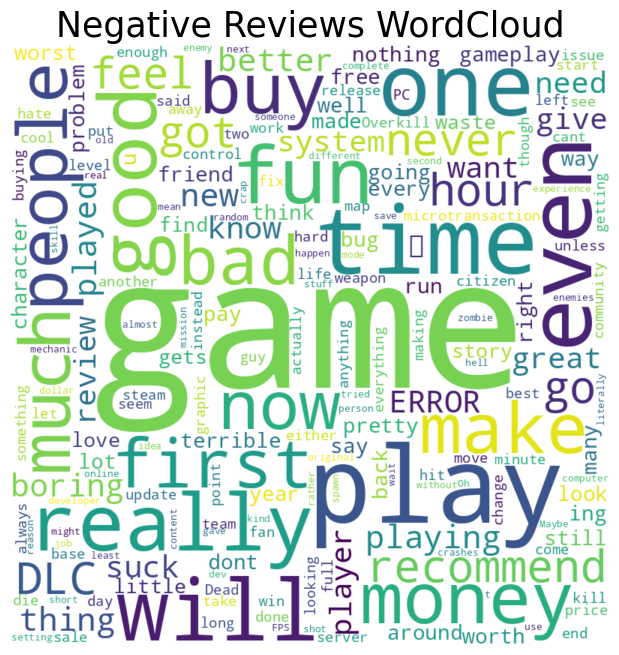

In [65]:
WordCloud_generator(negative_words, "Negative Reviews WordCloud")

### Handle the imbalance in the data

In [67]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# train data should be first transformed into matrix of token counts
def resample_data(train, labels):
    imbalanced = Counter(labels)

    print(f'Original dataset shape')
    print(f'-1: {imbalanced[-1]}, 1: {imbalanced[1]}')

    sm = SMOTE(random_state=1142)
    X_train_res, y_train_res = sm.fit_resample(train, labels)

    balanced = Counter(y_train_res)

    print(f'Resampled dataset shape')
    print(f'-1: {balanced[-1]}, 1: {balanced[1]}')

    return X_train_res, y_train_res

In [69]:
X_train_res_1, y_train_res_1 = resample_data(X_vect_train_1, y_train_1)

Original dataset shape
-1: 220076, 1: 1025270
Resampled dataset shape
-1: 1025270, 1: 1025270


In [70]:
import pickle

with open('res_1.pkl', 'wb') as fout:
    pickle.dump((X_train_res_1, y_train_res_1), fout)

In [71]:
X_train_res_2, y_train_res_2 = resample_data(X_vect_train_2, y_train_2)

Original dataset shape
-1: 219838, 1: 1025508
Resampled dataset shape
-1: 1025508, 1: 1025508


In [72]:
import pickle

with open('res_2.pkl', 'wb') as fout:
    pickle.dump((X_train_res_2, y_train_res_2), fout)

In [73]:
X_train_res_3, y_train_res_3 = resample_data(X_vect_train_3, y_train_3)

Original dataset shape
-1: 219953, 1: 1025393
Resampled dataset shape
-1: 1025393, 1: 1025393


In [74]:
import pickle

with open('res_3.pkl', 'wb') as fout:
    pickle.dump((X_train_res_3, y_train_res_3), fout)

In [75]:
X_train_res_4, y_train_res_4 = resample_data(X_vect_train_4, y_train_4)

Original dataset shape
-1: 221058, 1: 1024287
Resampled dataset shape
-1: 1024287, 1: 1024287


In [76]:
import pickle

with open('res_4.pkl', 'wb') as fout:
    pickle.dump((X_train_res_4, y_train_res_4), fout)

In [77]:
X_train_res_5, y_train_res_5 = resample_data(X_vect_train_5, y_train_5)

Original dataset shape
-1: 219671, 1: 1025674
Resampled dataset shape
-1: 1025674, 1: 1025674


In [78]:
import pickle

with open('res_5.pkl', 'wb') as fout:
    pickle.dump((X_train_res_5, y_train_res_5), fout)

In [122]:
labels_resampled = y_train_res_1.reset_index(name = "label")
labels_resampled.head(10)

,index,label
0,0,1
1,1,1
2,2,-1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,-1
8,8,1
9,9,-1


label Distribution (%):
 label
 1    50.0
-1    50.0
Name: proportion, dtype: float64


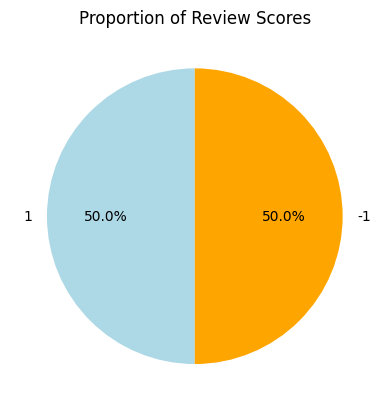

In [123]:
plot_pie_chart(labels_resampled, "label", "Resampled labels from the first split")

### Use MultinomialNB to classify the review text as either positive or negative

#### Perform this step on multiple chunks of data using the partial_fit method.

In [79]:
from sklearn.naive_bayes import MultinomialNB

In [81]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.partial_fit(X_train_res_1, y_train_res_1, classes = np.unique(y_train_res_1))

MultinomialNB()

In [82]:
nb.score(X_train_res_1, y_train_res_1)

0.8020648219493401

In [83]:
import pickle

with open('testVect.pkl', 'rb') as f:
    X_test_vect = pickle.load(f)

In [84]:
y_pred_1 = nb.predict(X_test_vect)

In [85]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
import seaborn as sns

def metrics(y_test, y_pred, name):

    print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
    print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100))
    print("Precision: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
    print("Recall: {:.2f}%".format(recall_score(y_test, y_pred) * 100))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.savefig(f"{name}.pdf", format='pdf')
    plt.show()

Accuracy: 71.29%

F1 Score: 80.15
Precision: 93.00%
Recall: 70.41%


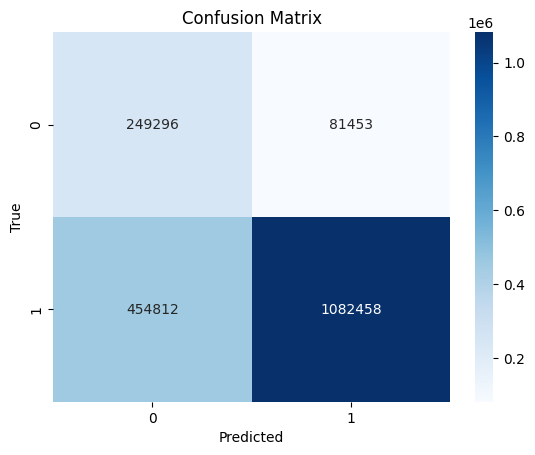

In [86]:
metrics(y_test, y_pred_1, "Confusion_Matrix_1")

In [87]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

          -1       0.35      0.75      0.48    330749
           1       0.93      0.70      0.80   1537270

    accuracy                           0.71   1868019
   macro avg       0.64      0.73      0.64   1868019
weighted avg       0.83      0.71      0.74   1868019



In [88]:
import pickle

with open('model_1.pkl', 'wb') as fout:
    pickle.dump(nb, fout)

In [89]:
nb.partial_fit(X_train_res_2, y_train_res_2)

MultinomialNB()

In [91]:
nb.score(X_train_res_2, y_train_res_2)

0.793171774379137

In [92]:
y_pred_2 = nb.predict(X_test_vect)

Accuracy: 70.34%

F1 Score: 79.55
Precision: 91.94%
Recall: 70.10%


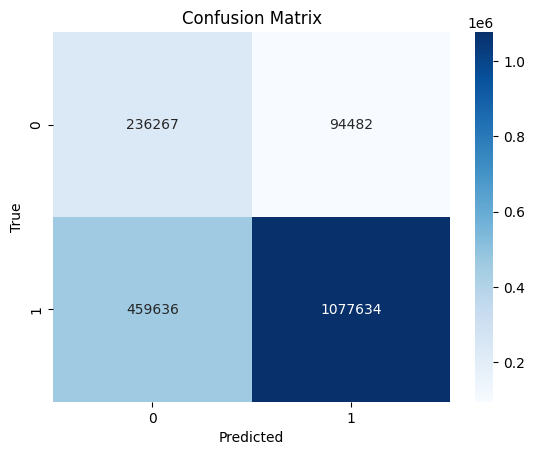

In [93]:
metrics(y_test, y_pred_2, "Confusion_Matrix_2")

In [94]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

          -1       0.34      0.71      0.46    330749
           1       0.92      0.70      0.80   1537270

    accuracy                           0.70   1868019
   macro avg       0.63      0.71      0.63   1868019
weighted avg       0.82      0.70      0.74   1868019



In [95]:
import pickle

with open('model_2.pkl', 'wb') as fout:
    pickle.dump(nb, fout)

In [96]:
nb.partial_fit(X_train_res_3, y_train_res_3)

MultinomialNB()

In [97]:
nb.score(X_train_res_3, y_train_res_3)

0.7915574808878157

In [98]:
y_pred_3 = nb.predict(X_test_vect)

Accuracy: 69.86%

F1 Score: 79.27
Precision: 91.35%
Recall: 70.01%


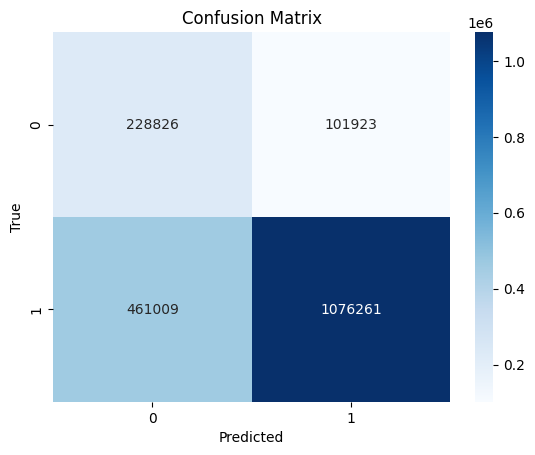

In [99]:
metrics(y_test, y_pred_3, "Confusion_Matrix_3")

In [100]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

          -1       0.33      0.69      0.45    330749
           1       0.91      0.70      0.79   1537270

    accuracy                           0.70   1868019
   macro avg       0.62      0.70      0.62   1868019
weighted avg       0.81      0.70      0.73   1868019



In [101]:
import pickle

with open('model_3.pkl', 'wb') as fout:
    pickle.dump(nb, fout)

In [102]:
nb.partial_fit(X_train_res_4, y_train_res_4)

MultinomialNB()

In [103]:
nb.score(X_train_res_4, y_train_res_4)

0.7848640078415522

In [104]:
y_pred_4 = nb.predict(X_test_vect)

In [105]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

          -1       0.33      0.68      0.44    330749
           1       0.91      0.70      0.79   1537270

    accuracy                           0.70   1868019
   macro avg       0.62      0.69      0.62   1868019
weighted avg       0.81      0.70      0.73   1868019



Accuracy: 69.65%

F1 Score: 79.14
Precision: 91.10%
Recall: 69.95%


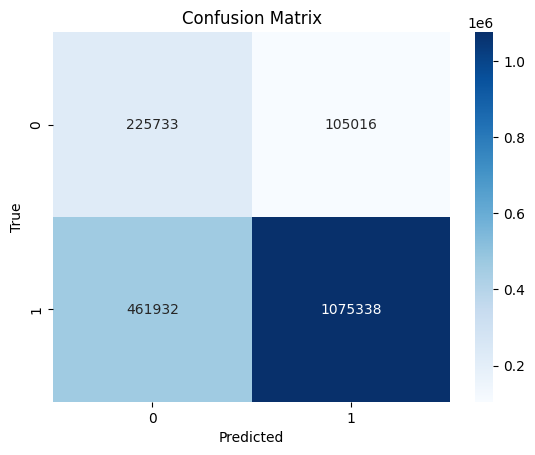

In [106]:
metrics(y_test, y_pred_4, "Confusion_Matrix_4")

In [107]:
import pickle

with open('model_4.pkl', 'wb') as fout:
    pickle.dump(nb, fout)

In [108]:
nb.partial_fit(X_train_res_5, y_train_res_5)

MultinomialNB()

In [109]:
nb.score(X_train_res_5, y_train_res_5)

0.7796682961642784

In [110]:
y_pred_5 = nb.predict(X_test_vect)

Accuracy: 69.19%

F1 Score: 78.76
Precision: 90.99%
Recall: 69.43%


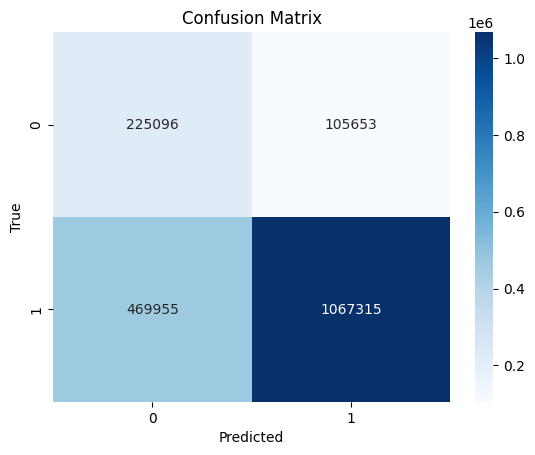

In [111]:
metrics(y_test, y_pred_5, "Confusion_Matrix_5")

In [112]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

          -1       0.32      0.68      0.44    330749
           1       0.91      0.69      0.79   1537270

    accuracy                           0.69   1868019
   macro avg       0.62      0.69      0.61   1868019
weighted avg       0.81      0.69      0.73   1868019



In [113]:
import pickle

with open('model_5.pkl', 'wb') as fout:
    pickle.dump(nb, fout)

In [27]:
import pickle

with open('testVect.pkl', 'wb') as fout:
    pickle.dump(X_test_vect, fout)

In [50]:
import pickle

with open('model_trainVect_df1.pkl', 'rb') as f:
    nb, _ = pickle.load(f)